各問診・臨床データから、同世代の方と比較した疾病リスクの高さを表示する。
またどの因子が特に影響を与えているかを表示して改善を促す。各生活習慣の状態の各世代との比較も表示（同世代との良し悪し、どの世代と同じレベルなど）

In [1]:
import numpy
import pandas as pd

data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [25]:
data = data.drop("Education", axis=1)
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,1.0


In [26]:
corr_matrix = data.corr()
print(corr_matrix['Diabetes_binary'].sort_values(ascending=False))

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


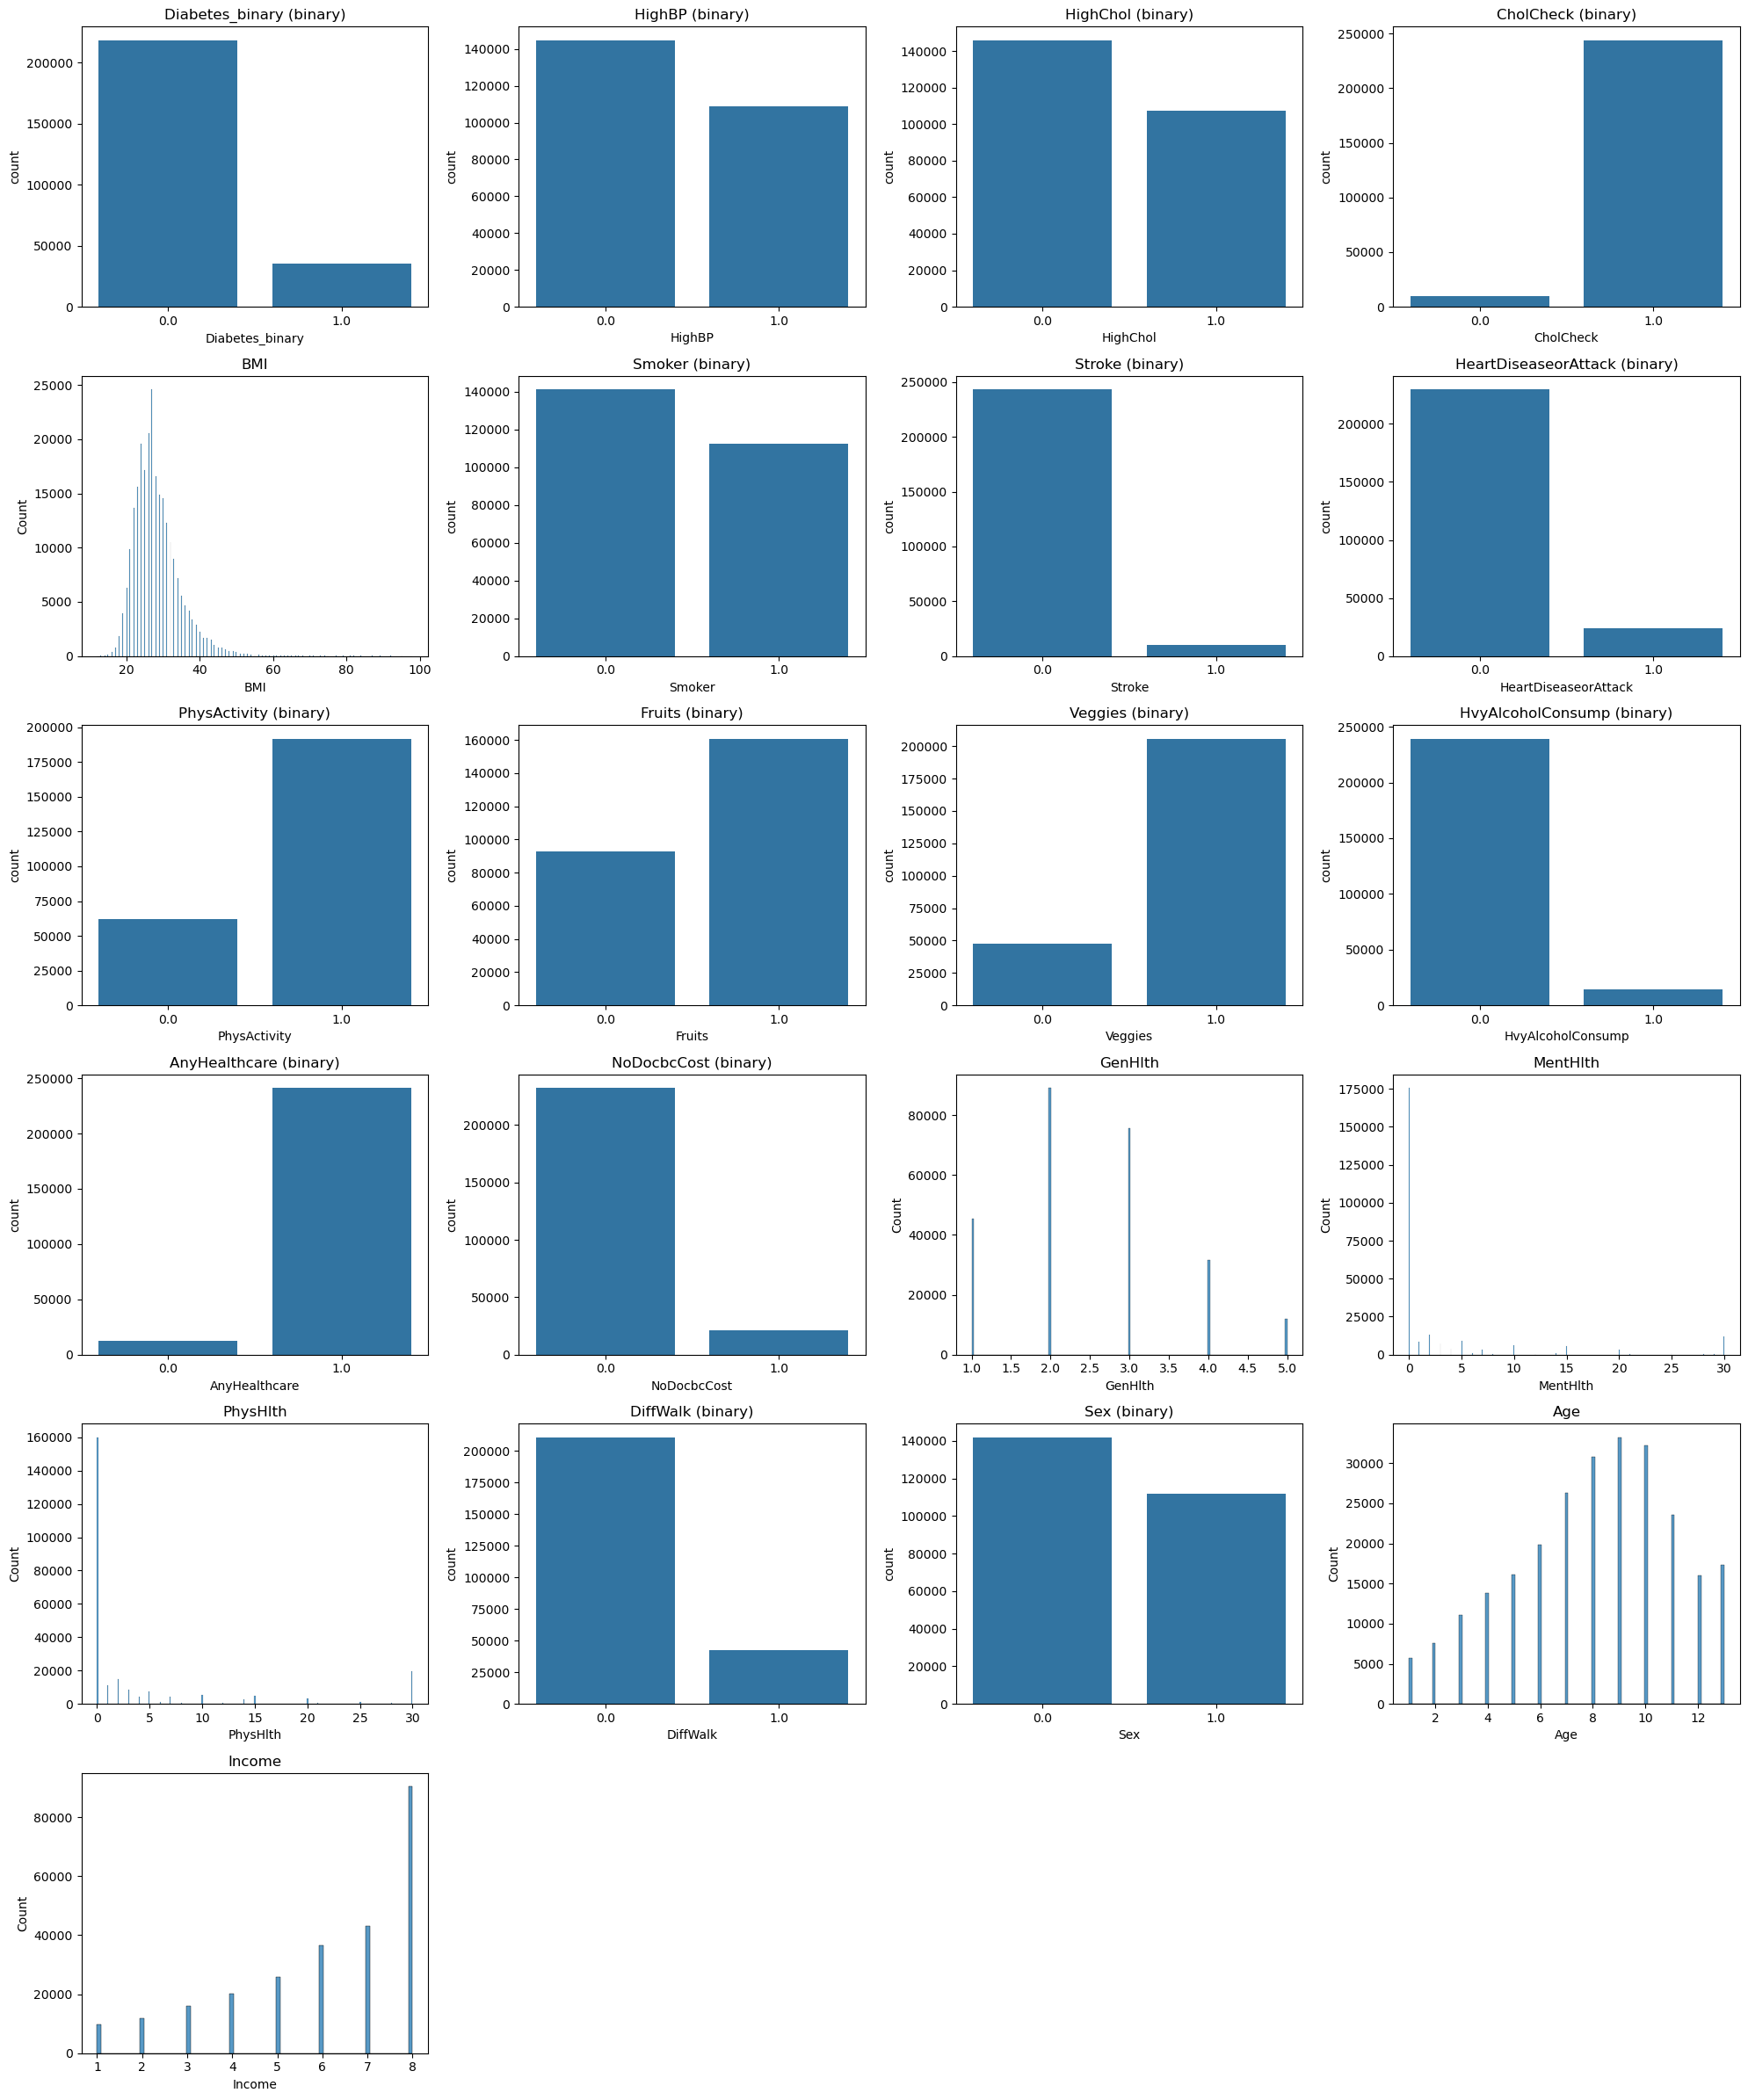

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 列をバイナリと連続に分類
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
numeric_cols = [col for col in data.columns if col not in binary_cols]

# すべての特徴量をまとめて扱う
all_cols = data.columns

# 5×5の枠（必要に応じて拡張）
n_cols = 4
n_rows = (len(all_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    ax = axes[i]
    
    if col in binary_cols:
        # 0/1は棒グラフ
        sns.countplot(x=data[col], ax=ax)
        ax.set_title(f"{col} (binary)")
    else:
        # 連続値はヒストグラム
        sns.histplot(data[col], kde=False, ax=ax)
        ax.set_title(col)

# 使ってない枠を非表示に
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



In [28]:
#欠損値の確認
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Income                  0
dtype: int64

In [29]:
#外れ値の確認
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['BMI'] < Q1 - 1.5 * IQR) | (data['BMI'] > Q3 + 1.5 * IQR)]

print("外れ値の数:", len(outliers))

外れ値の数: 9847


In [30]:
data["BMI"].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

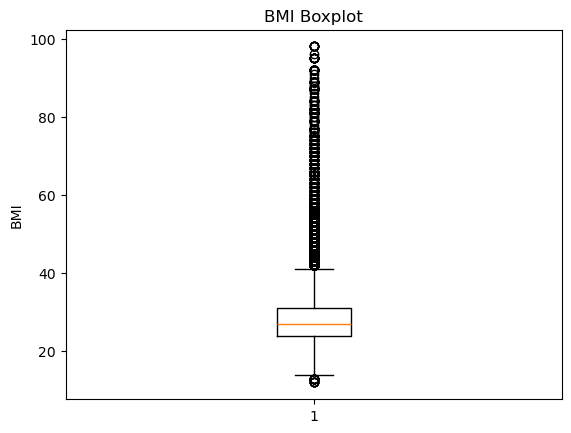

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(data["BMI"])
plt.title("BMI Boxplot")
plt.ylabel("BMI")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pickle

# --- 目的変数と説明変数の分離 ---
X = data.drop("Diabetes_binary", axis=1)
y = data["Diabetes_binary"]

# --- 学習データとテストデータに分割 ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- ランダムフォレストモデル ---
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# --- 学習 ---
model.fit(X_train, y_train)

# --- モデル保存 ---
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

# --- 特徴量名も保存 ---
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

print("モデルと特徴量名を保存しました")

モデルと特徴量名を保存しました


In [32]:
# --- 予測 ---
# 確率の取得
y_prob = model.predict_proba(X_test)[:, 1]

# 閾値を指定
threshold = 0.6

# 閾値で0/1を決める
y_pred = (y_prob >= threshold).astype(int)

# --- 評価 ---
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("AUC:", auc)

Accuracy: 0.8599810785241249
AUC: 0.7978265438350293


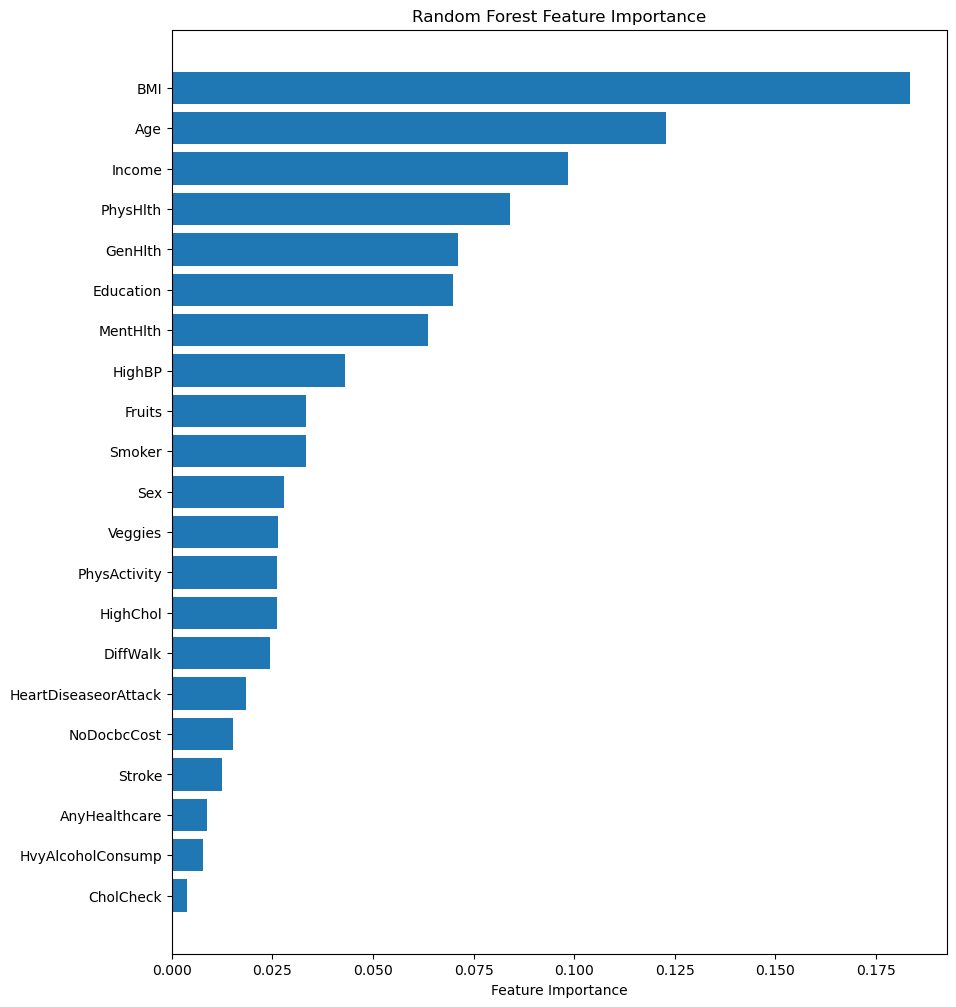

In [11]:
# ============================
# ① Feature Importance（特徴量重要度）
# ============================

importances = model.feature_importances_
indices = importances.argsort()[::-1]   # 降順に並べる

plt.figure(figsize=(10, 12))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), X_train.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [33]:
# --- 特徴量名の取得 ---
feature_names = X_train.columns

# --- 重要度の取得 ---
importances = model.feature_importances_

# --- データフレーム化してソート ---
imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

display(imp_df)  # 数値一覧を表示

,feature,importance
3,BMI,0.201164
18,Age,0.133624
19,Income,0.109386
15,PhysHlth,0.092465
13,GenHlth,0.073201
14,MentHlth,0.070272
0,HighBP,0.044056
8,Fruits,0.034950
4,Smoker,0.034723
17,Sex,0.029300


In [ ]:
import shap

# ============================
# ② SHAP（Shapley値）
# ============================

# TreeExplainer（ランダムフォレストに適した方法）
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# ----- Summary Plot（全体の影響）
shap.summary_plot(shap_values[1], X_train)  # クラス1（陽性）側
# ※Jupyter Notebookだと自動で表示される


# ----- Bar Plot（平均影響度）
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

In [21]:
# 重要度0.01未満の特徴量を抽出
low_importance_features = imp_df[imp_df["importance"] < 0.01]["feature"].tolist()
print("除外する特徴量:", low_importance_features)

# 低重要度の特徴量を除外した新しいデータセットを作成
X_train_reduced = X_train.drop(columns="Education")
X_test_reduced  = X_test.drop(columns="Education")

除外する特徴量: ['AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck']


In [22]:
#再度モデル作成（ランダムフォレスト）

model_reduced = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model_reduced.fit(X_train_reduced, y_train)

# 予測
y_pred_reduced = model_reduced.predict(X_test_reduced)
y_prob_reduced = model_reduced.predict_proba(X_test_reduced)[:, 1]

# 評価
acc_reduced = accuracy_score(y_test, y_pred_reduced)
auc_reduced = roc_auc_score(y_test, y_prob_reduced)

print("Accuracy(再学習後):", acc_reduced)
print("AUC(再学習後):", auc_reduced)

Accuracy(再学習後): 0.858640807316304
AUC(再学習後): 0.7978267235490522


In [ ]:
import streamlit as st
import pickle
import numpy as np

# -------------------------
# モデルと特徴量の読み込み
# -------------------------
with open("rf_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)

st.title("糖尿病リスク予測アプリ")

st.write("必要な項目を入力し、糖尿病リスクを予測できます。")

# -------------------------
# 入力フォーム
# -------------------------
inputs = {}
st.header("入力")

for feature in feature_names:
    # 0/1 の特徴量はセレクトボックス
    if feature in ["HighBP","HighChol","CholCheck","Smoker","Stroke",
                   "HeartDiseaseorAttack","PhysActivity","HvyAlcoholConsump",
                   "AnyHealthcare","NoDocbcCost","DiffWalk","Sex"]:
        inputs[feature] = st.selectbox(f"{feature}（0 or 1）", [0, 1])

    # 連続値は数値入力
    else:
        inputs[feature] = st.number_input(f"{feature}", min_value=0.0, step=1.0)

# -------------------------
# 予測
# -------------------------
if st.button("予測する"):
    # 入力値をモデルに合わせて配列にする
    x = np.array([inputs[f] for f in feature_names]).reshape(1, -1)

    prob = model.predict_proba(x)[0][1]
    pred = model.predict(x)[0]

    st.subheader("予測結果")

    st.write(f"**糖尿病リスク（確率）: {prob:.3f}**")
    st.write(f"予測（0/1）: **{pred}**")

    if prob > 0.5:
        st.error("⚠ 糖尿病リスクが高めです。")
    else:
        st.success("糖尿病リスクは比較的低めです。")


2025-12-07 10:10:48.007 
  command:

    streamlit run c:\Users\Ikumi Moritoki\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-07 10:10:48.007 Session state does not function when running a script without `streamlit run`


In [49]:
# gender を数値化(男性：０ 女性：１)
data["gender"] = data["gender"].map({"Male": 0, "Female": 1})

# 目的変数（0/1）
y = data["disease_risk"]

# 特徴量
X = data.drop(["id", "disease_risk"], axis=1)

print(X)

       age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0       56       0  20.5         4198          3.9             3.4   
1       69       1  33.3        14359          9.0             4.7   
2       46       0  31.6         1817          6.6             4.2   
3       32       1  38.2        15772          3.6             2.0   
4       60       1  33.6         6037          3.8             4.0   
...    ...     ...   ...          ...          ...             ...   
99995   53       0  33.1         4726          3.9             2.0   
99996   22       0  35.1        11554          4.5             3.1   
99997   37       0  18.9         3924          3.8             1.0   
99998   72       1  27.8        16110          5.6             0.8   
99999   37       0  35.4         8222          9.1             1.8   

       calories_consumed  smoker  alcohol  resting_hr  systolic_bp  \
0                   1602       0        0          97          161   
1                  

In [50]:
data

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,0,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,1,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,0,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,1,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,1,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,0,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,0,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,0,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,1,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


In [51]:
print(data['disease_risk'].value_counts())


disease_risk
0    75179
1    24821
Name: count, dtype: int64


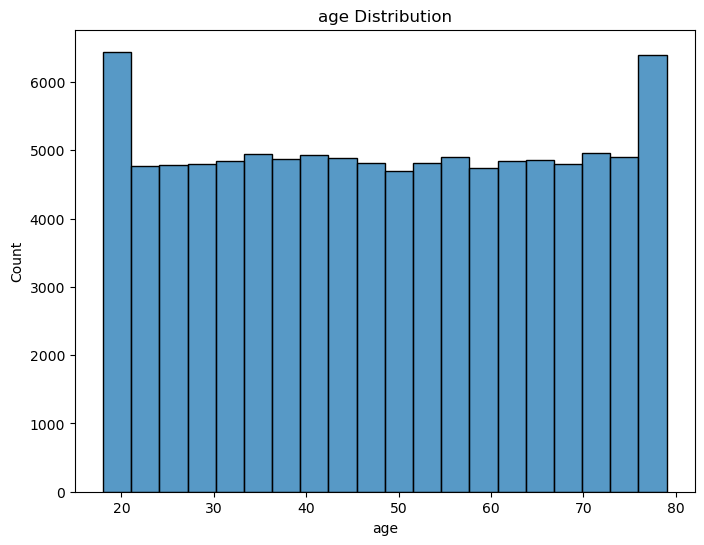

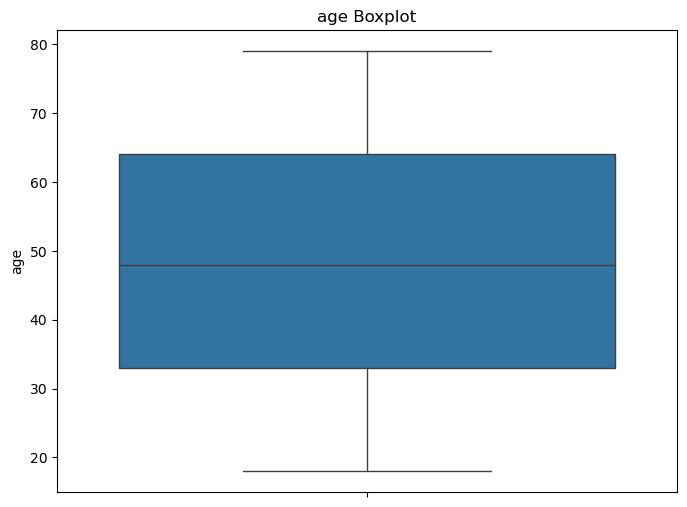

count    100000.000000
mean         48.525990
std          17.886768
min          18.000000
25%          33.000000
50%          48.000000
75%          64.000000
max          79.000000
Name: age, dtype: float64


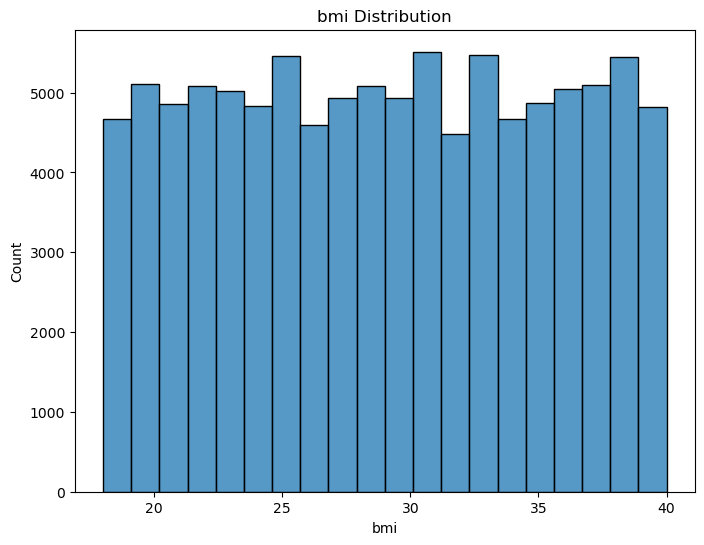

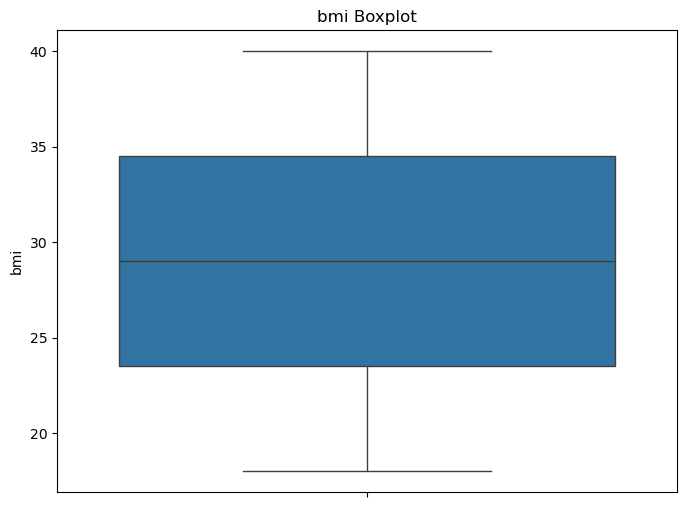

count    100000.000000
mean         29.024790
std           6.352666
min          18.000000
25%          23.500000
50%          29.000000
75%          34.500000
max          40.000000
Name: bmi, dtype: float64


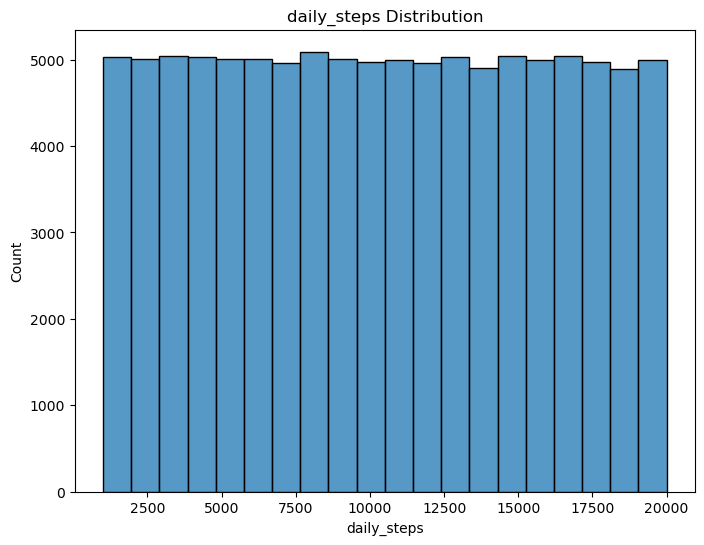

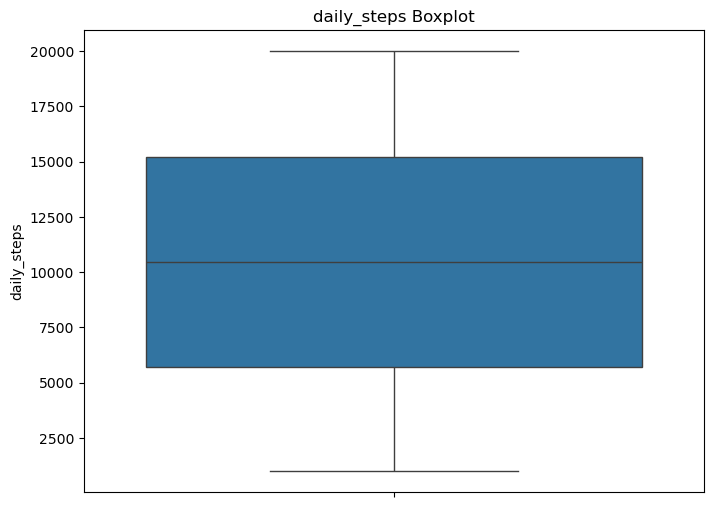

count    100000.00000
mean      10479.87029
std        5483.63236
min        1000.00000
25%        5729.00000
50%       10468.00000
75%       15229.00000
max       19999.00000
Name: daily_steps, dtype: float64


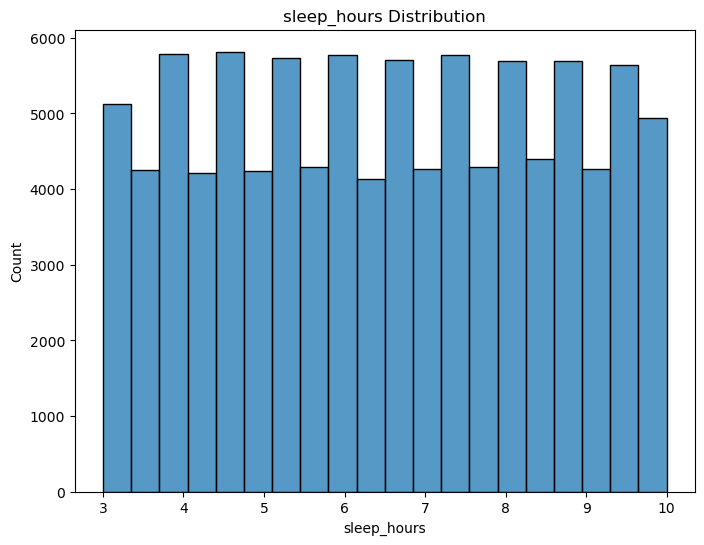

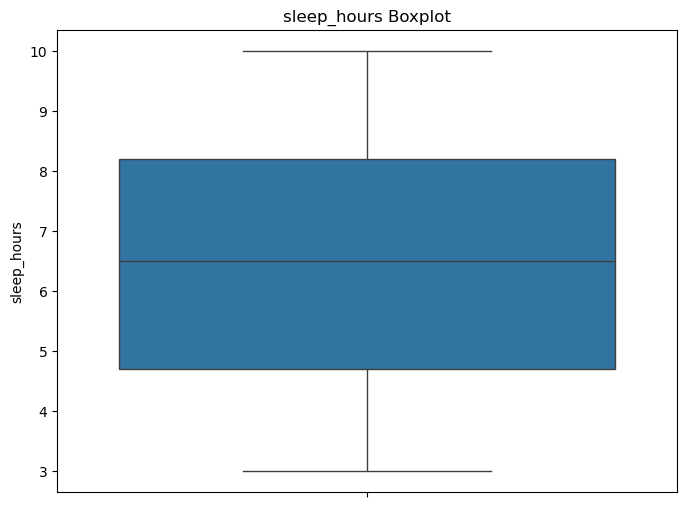

count    100000.000000
mean          6.491784
std           2.021922
min           3.000000
25%           4.700000
50%           6.500000
75%           8.200000
max          10.000000
Name: sleep_hours, dtype: float64


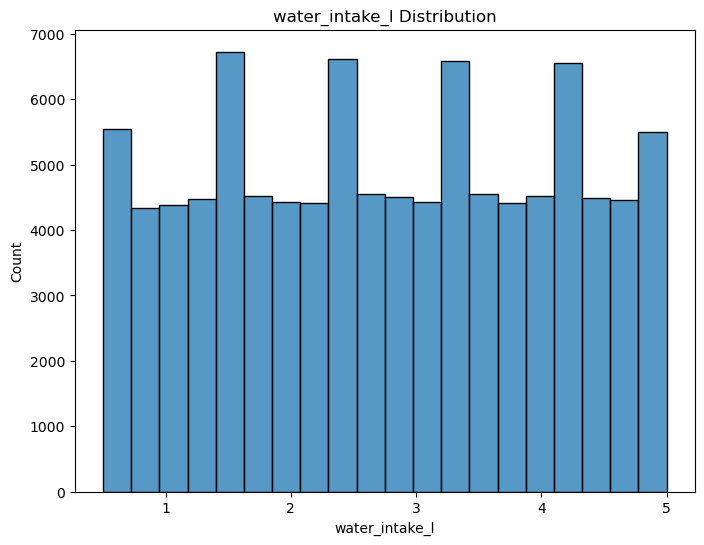

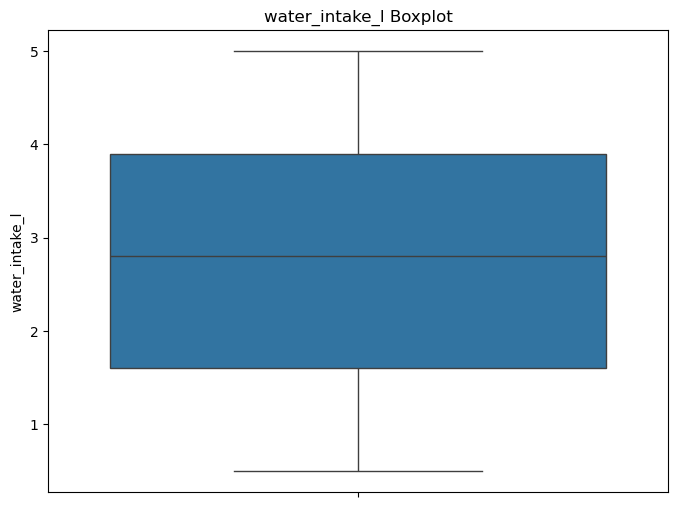

count    100000.000000
mean          2.751496
std           1.297338
min           0.500000
25%           1.600000
50%           2.800000
75%           3.900000
max           5.000000
Name: water_intake_l, dtype: float64


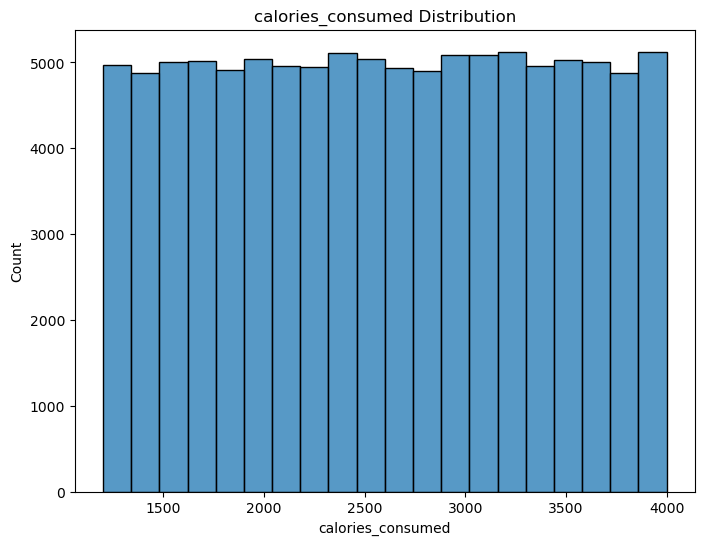

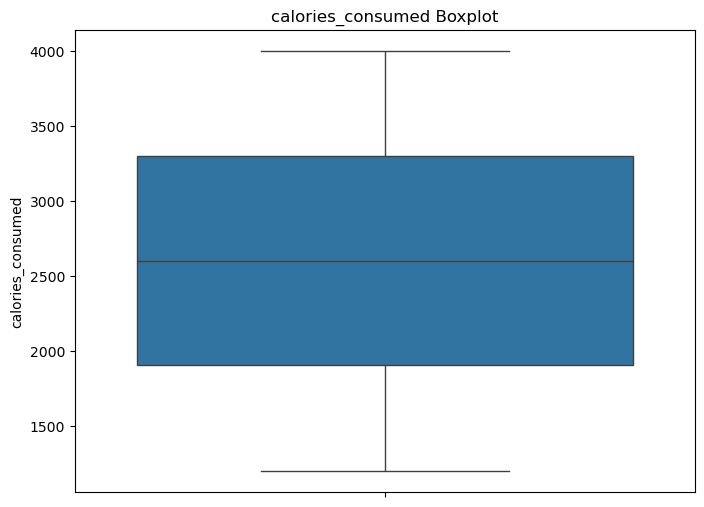

count    100000.000000
mean       2603.341200
std         807.288563
min        1200.000000
25%        1906.000000
50%        2603.000000
75%        3299.000000
max        3999.000000
Name: calories_consumed, dtype: float64


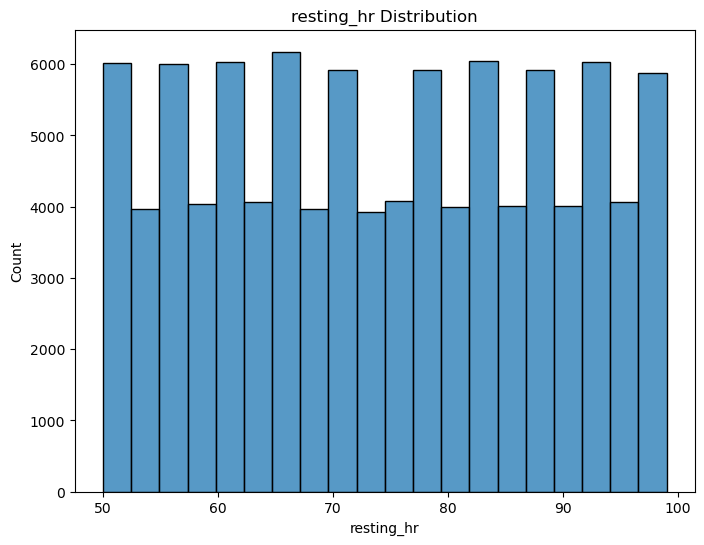

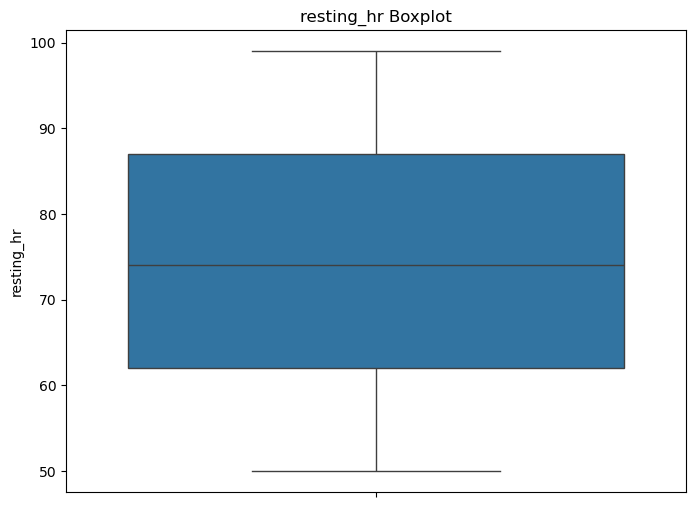

count    100000.000000
mean         74.457420
std          14.423715
min          50.000000
25%          62.000000
50%          74.000000
75%          87.000000
max          99.000000
Name: resting_hr, dtype: float64


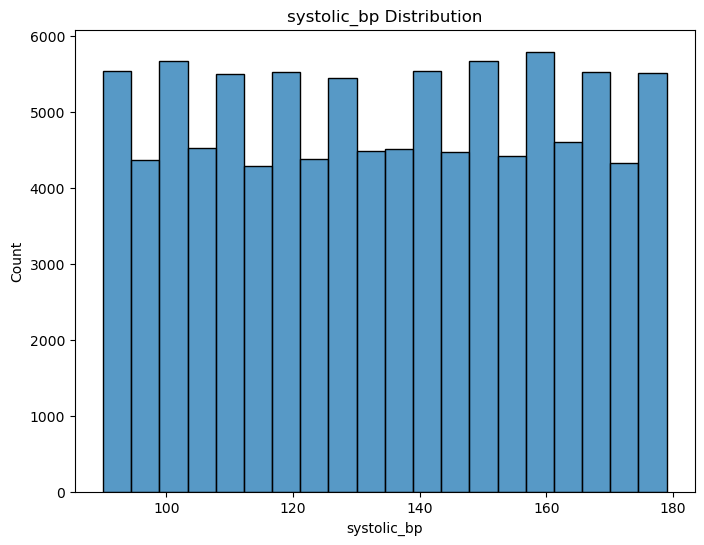

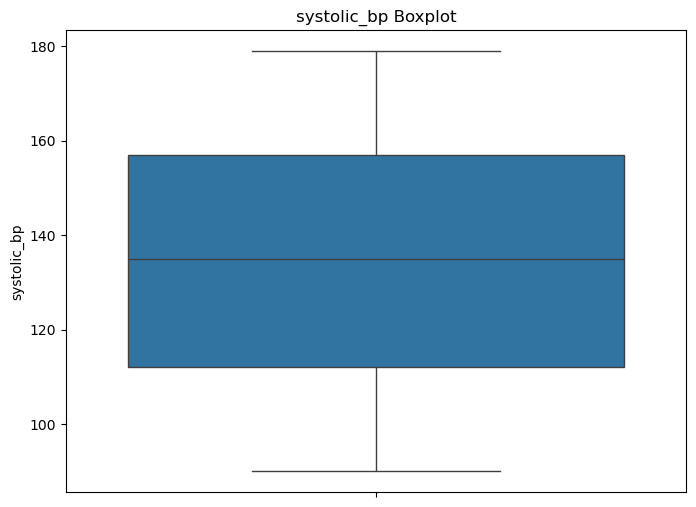

count    100000.00000
mean        134.58063
std          25.95153
min          90.00000
25%         112.00000
50%         135.00000
75%         157.00000
max         179.00000
Name: systolic_bp, dtype: float64


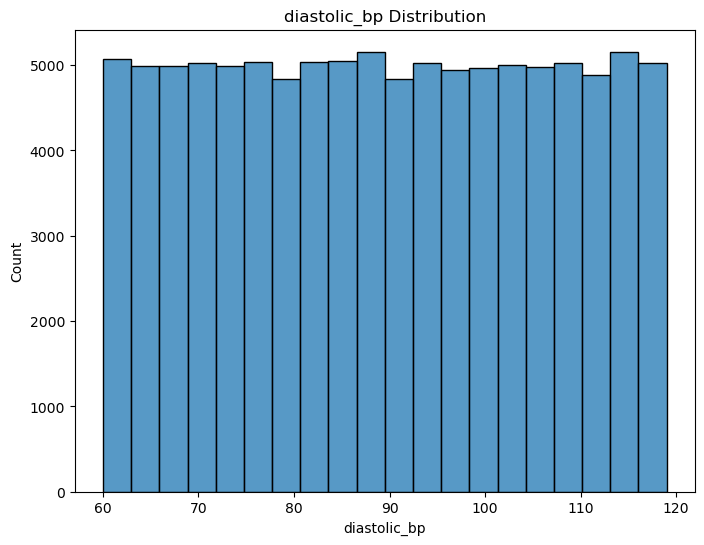

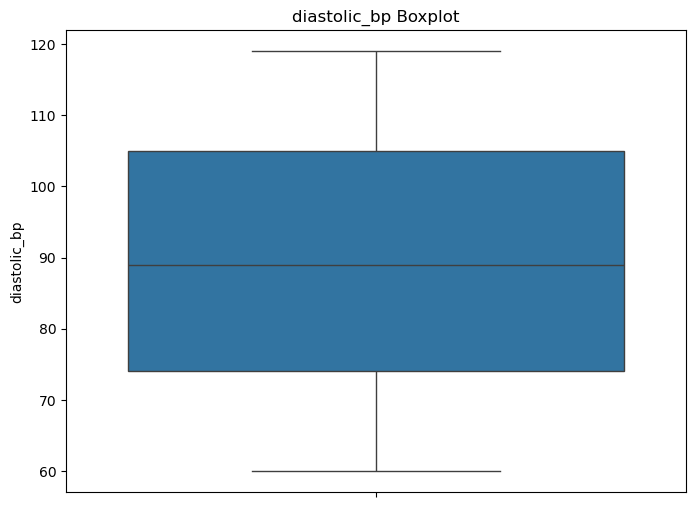

count    100000.000000
mean         89.508850
std          17.347041
min          60.000000
25%          74.000000
50%          89.000000
75%         105.000000
max         119.000000
Name: diastolic_bp, dtype: float64


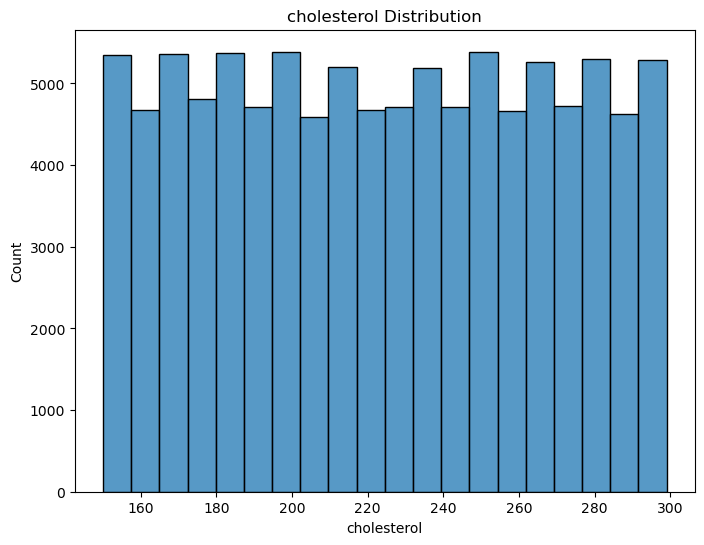

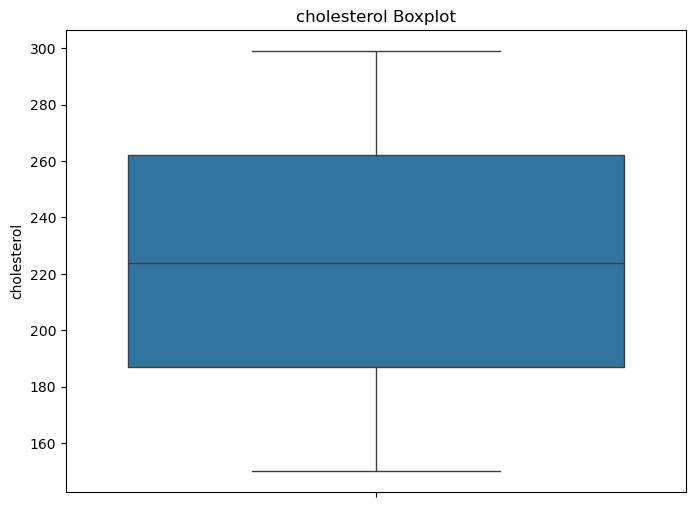

count    100000.000000
mean        224.300630
std          43.327749
min         150.000000
25%         187.000000
50%         224.000000
75%         262.000000
max         299.000000
Name: cholesterol, dtype: float64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#ヒストグラム
def plot_hist(column_name, data, bins=20, kde=False):
    """
    任意の列のヒストグラムを描く関数
    column_name: ヒストグラムにしたい列名
    data: DataFrame
    bins: 棒の数（デフォルト20）
    kde: カーネル密度曲線を表示するか（True/False）
    """
    plt.figure(figsize=(8,6))
    sns.histplot(data[column_name], bins=bins, kde=kde)
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.title(f"{column_name} Distribution")
    plt.show()

#箱ひげ図
def plot_box(column_name, data):
    """
    任意の列の箱ひげ図を描く関数
    column_name: 箱ひげ図にしたい列名
    data: DataFrame
    """
    plt.figure(figsize=(8,6))
    sns.boxplot(y=data[column_name])
    plt.ylabel(column_name)
    plt.title(f"{column_name} Boxplot")
    plt.show()


# age
plot_hist("age", X)
plot_box("age", X)
print(X["age"].describe())

# bmi
plot_hist("bmi", X)
plot_box("bmi", X)
print(X["bmi"].describe())

# daily_steps
plot_hist("daily_steps", X)
plot_box("daily_steps", X)
print(X["daily_steps"].describe())

# sleep_hours
plot_hist("sleep_hours", X)
plot_box("sleep_hours", X)
print(X["sleep_hours"].describe())

# water_intake_l
plot_hist("water_intake_l", X)
plot_box("water_intake_l", X)
print(X["water_intake_l"].describe())

# calories_consumed
plot_hist("calories_consumed", X)
plot_box("calories_consumed", X)
print(X["calories_consumed"].describe())

# resting_hr
plot_hist("resting_hr", X)
plot_box("resting_hr", X)
print(X["resting_hr"].describe())

# systolic_bp
plot_hist("systolic_bp", X)
plot_box("systolic_bp", X)
print(X["systolic_bp"].describe())

# diastolic_bp
plot_hist("diastolic_bp", X)
plot_box("diastolic_bp", X)
print(X["diastolic_bp"].describe())

# cholesterol
plot_hist("cholesterol", X)
plot_box("cholesterol", X)
print(X["cholesterol"].describe())




In [53]:
#一様分布でもモデル構築に影響はない？（統計解析の時だけ？？）

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForest モデル学習
model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    class_weight="balanced" 
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=400,
                       random_state=42)

In [ ]:
#モデルの精度を評価
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 予測(１である確率)
y_prob = model.predict_proba(X_test)[:, 1]

# 予測(0/1に変換)
threshold = 0.001
y_pred = (y_prob >= threshold).astype(int)

#正解率
print("Accuracy:", accuracy_score(y_test, y_pred))
Accuracy: 0.7247
AUC: 0.4945126324808641
Confusion matrix:
 [[14272   764]
 [ 4742   222]]
print("AUC:", roc_auc_score(y_test, y_prob))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7247
AUC: 0.4945126324808641
Confusion matrix:
 [[14272   764]
 [ 4742   222]]


c:\Users\Ikumi Moritoki\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 特徴量を標準化（ロジスティック回帰はスケーリングした方が安定）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデル作成
models = LogisticRegression(
    random_state=42,
    class_weight='balanced',  # クラス不均衡に対応
    max_iter=1000              # 収束しやすくするため
)

# 学習
models.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [36]:
# 確率予測
y_prob = models.predict_proba(X_test_scaled)[:, 1]

# デフォルト閾値0.5でラベル予測
y_pred = (y_prob >= 0.7).astype(int)

# 評価
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7518
AUC: 0.501785306990325
Confusion matrix:
 [[15036     0]
 [ 4964     0]]


In [41]:
import pandas as pd

# X: 特徴量, y: disease_risk
df = X.copy()
df['disease_risk'] = y

# 相関を計算
corr_matrix = df.corr()
print(corr_matrix['disease_risk'].sort_values(ascending=False))

disease_risk         1.000000
resting_hr           0.005437
bmi                  0.003586
family_history       0.003225
calories_consumed    0.002737
sleep_hours          0.002582
gender               0.001957
age                  0.001671
smoker               0.001125
systolic_bp          0.001086
alcohol              0.000515
water_intake_l      -0.001902
daily_steps         -0.003444
diastolic_bp        -0.003774
cholesterol         -0.003941
Name: disease_risk, dtype: float64


In [ ]:
糖尿病予防に関するデータ（厚労省など）
影響度が高い因子をキーにして、コメントを出す（RAG）